# Comment (Processing) EXTRAS 01

### Comment Type

We still have some extra questions we could answer with the comment data.

---


In Comment Processing 02 we counted who applaudes the most.

In 03 we split up who applaudes who.

But we would also like a concise plot of who gets the most applause (not considering by whom)

In [1]:
import pandas as pd
from util.getComments import getComments
from util.countApplause import countApplause
import matplotlib.pyplot as plt
from tueplots import bundles
from util.colors import sevenParties
import numpy as np
from util.jsonIO import importJson


In [2]:
dataExtracted = importJson("speeches.json")


In [3]:
# Increase the resolution of all the plots below
plt.rcParams.update({"figure.dpi": 150})
# Use neurips style
plt.rcParams.update(bundles.neurips2021())


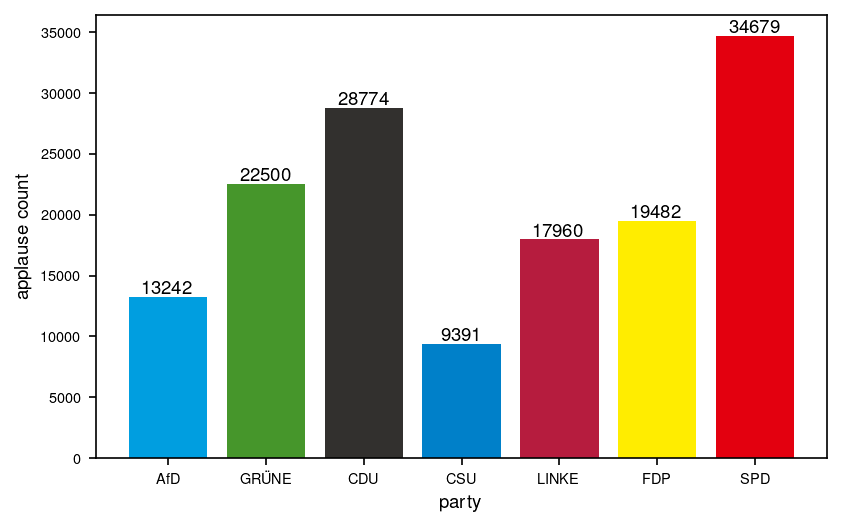

In [4]:
parties = ['Alternative für Deutschland', 'Bündnis 90/Die Grünen', 'Christlich Demokratische Union Deutschlands',
           'Christlich-Soziale Union in Bayern', 'Die Linke', 'Freie Demokratische Partei', 'Sozialdemokratische Partei Deutschlands']
applauseReceived = [countApplause(getComments(dataExtracted, partyFilter=party))["applause count"].sum()
                    for party in parties]

shortNames = ["AfD", "GRÜNE", "CDU", "CSU", "LINKE", "FDP", "SPD"]

fig, ax = plt.subplots()
cntPlot = plt.bar(shortNames, applauseReceived, color=sevenParties)
# plt.title("Applause Received")
plt.xlabel("party")
plt.ylabel("applause count")
for i, bar in enumerate(cntPlot):
    ax.annotate(bar.get_height(),
                (bar.get_x()+bar.get_width()/2., bar.get_height()),
                ha='center', va='center', xytext=(0, 4), textcoords='offset points')


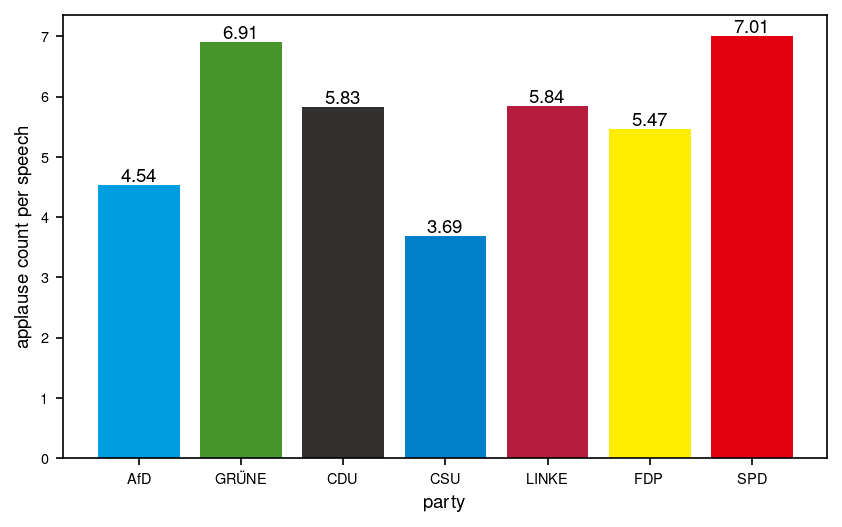

In [5]:
applauseReceivedNormalized = [np.round(countApplause(getComments(dataExtracted, partyFilter=party))[
                                       "applause count"].sum() / len(dataExtracted[dataExtracted["main-speaker-party"] == party]), 2)
                              for party in parties]

fig, ax = plt.subplots()
cntPlot = plt.bar(shortNames, applauseReceivedNormalized, color=sevenParties)
# plt.title("Applause Received")
plt.xlabel("party")
plt.ylabel("applause count per speech")
for i, bar in enumerate(cntPlot):
    ax.annotate(bar.get_height(),
                (bar.get_x()+bar.get_width()/2., bar.get_height()),
                ha='center', va='center', xytext=(0, 4), textcoords='offset points')

